In [3]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'CustomerID': range(1, 201),
    'Gender': np.random.choice(['Male', 'Female'], 200),
    'Age': np.random.randint(18, 70, size=200),
    'Annual Income (k$)': np.random.randint(15, 135, size=200),
    'Spending Score (1-100)': np.random.randint(1, 100, size=200)
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('customer_data.csv', index=False)


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('customer_data.csv')

# Display the first few rows
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  68                      94
1           2  Female   56                  22                      62
2           3    Male   66                  41                      69
3           4    Male   69                  41                      76
4           5    Male   49                 112                      16


In [5]:
# Check for any missing values
print(df.isnull().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Matplotlib is building the font cache; this may take a moment.


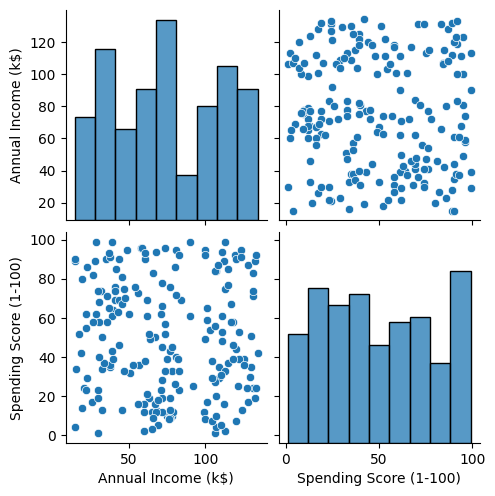

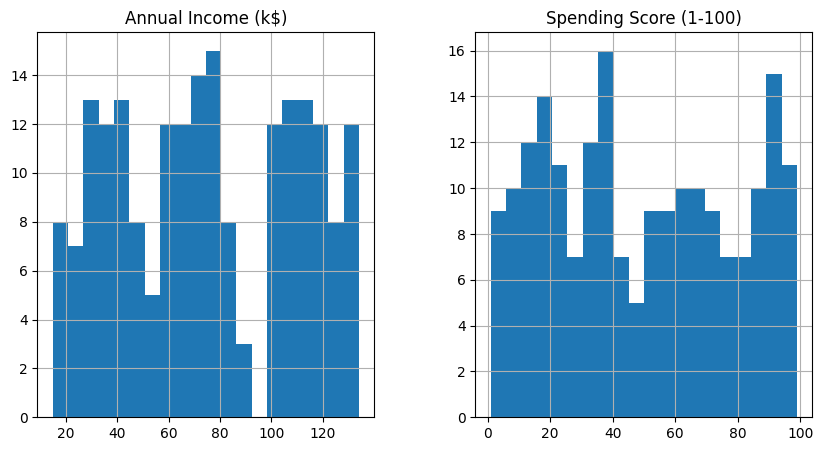

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize the relationships between 'Annual Income' and 'Spending Score'
sns.pairplot(df[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

# Histograms for each
df[['Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=20, figsize=(10, 5))
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])


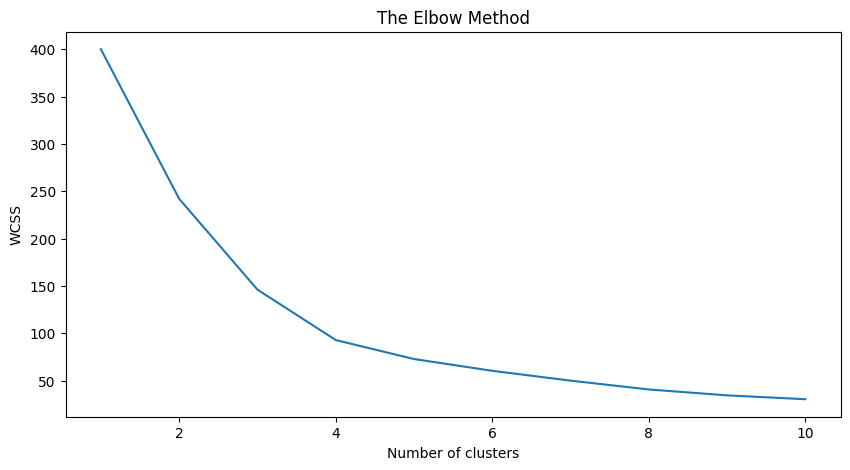

In [11]:
from sklearn.cluster import KMeans

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Let's assume the elbow is at 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)


   Annual Income (k$)  Spending Score (1-100)
0           71.581395               23.139535
1          109.277778               79.916667
2          115.780488               27.268293
3           45.056604               76.547170
4           31.555556               30.518519


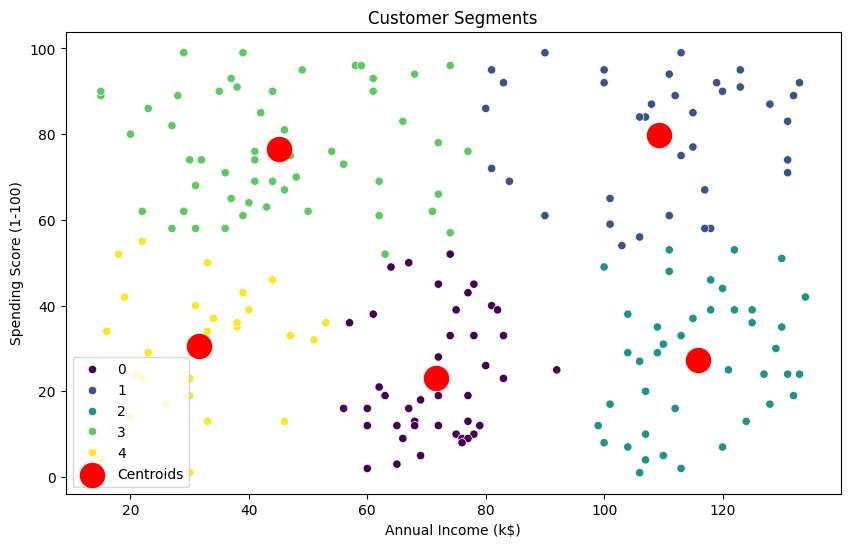

In [12]:
# Add the cluster labels as a column in the DataFrame
df['Cluster'] = cluster_labels

# Analyze the centroids
centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(centroids)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', legend='full')
plt.scatter(centroids['Annual Income (k$)'], centroids['Spending Score (1-100)'], s=300, c='red', label='Centroids')
plt.title('Customer Segments')
plt.legend()
plt.show()
